Modelling

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
t = np.arange(0.0, 20.0, 0.002)

def cos_wave(f, phi, a):
    return a * np.cos(f* 2 * np.pi * t + phi)

Phase Shift

In [3]:
@interact(f_1=(0.1,2.,0.1), phi_1=(0.,np.pi*2,np.pi/20), a_1=(0.5,1.5,0.1),
          f_2=(0.1,2.,0.1), phi_2=(0.,np.pi*2,np.pi/20), a_2=(0.5,1.5,0.1))
def plot(f_1, phi_1, a_1, f_2, phi_2, a_2):
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10))
    fig.tight_layout(pad=5.0)
    
    c1 = cos_wave(f_1, phi_1, a_1)
    c2 = cos_wave(f_2, phi_2, a_2)
    m = c1 * c2 #mixer
    #s = c1 + c2 #interference
    x = np.logical_xor(c1>0, c2>0)
    
    ax1.plot(t, c1, label='c1')
    ax1.plot(t, c2, label='c2')
    ax1.plot(t, m, label='c1 * c2')
    ax1.set(xlabel='time (s)', title='mixer')
    ax1.grid()
    #hängt auch von den amplituden und nicht nur vom phaseshift ab
    ax1.legend(loc='lower left')
    
    ax2.plot(t, c1, label='c1')
    ax2.plot(t, c2, label='c2')
    ax2.plot(t, x, label='c1 xor c2')
    ax2.set(xlabel='time (s)', title='XOR')
    ax2.grid()
    ax2.legend(loc='lower left')
    
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='f_1', max=2.0, min=0.1), FloatSlider(value=3.1415926…

Mean value and variance from given measured values

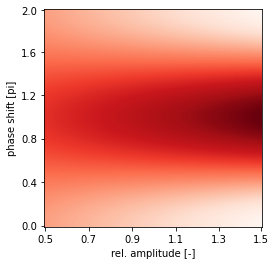

In [32]:
c1 = cos_wave(1.0, 3.14, 1.0)
f_2 = 1.0
X = []
for phi_2 in np.arange(0.,np.pi*2,np.pi/50):
    Y = []
    for a_2 in np.arange(0.5,1.5,0.01):
        c2 = cos_wave(f_2, phi_2, a_2)
        m = c1 * c2 #mixer
        Y.append(np.mean(m))
    X.append(Y)
    #print ("phi = {:.2f}, mean = {:.2f},min = {:.2f}, max ={:.2f}".format(
       #phi_2, np.mean(Y),np.min(Y,np.max(Y)))
plt.imshow(X,cmap='Reds')
plt.gca().invert_yaxis()
locs = [0, 20, 40, 60, 80, 99]
plt.xticks(locs, ["{:.1f}".format(i) for i in np.arange(0.5,1.5,0.01)[locs]])
plt.yticks(locs, ["{:.1f}".format(i/np.pi) for i in np.arange(0.,np.pi*2,np.pi/50)[locs]])
plt.xlabel('rel. amplitude [-]')
plt.ylabel('phase shift [pi]')
plt.title('')
plt.show()

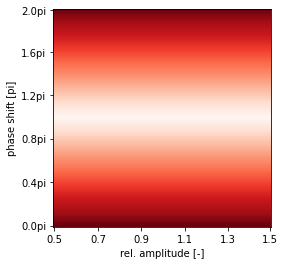

In [33]:
c1 = cos_wave(1.0, 3.14, 1.0)
f_2 = 1.0
X = []
for phi_2 in np.arange(0.,np.pi*2,np.pi/50):
    Y = []
    for a_2 in np.arange(0.5,1.5,0.01):
        c2 = cos_wave(f_2, phi_2, a_2)
        x = np.logical_xor(c1>0, c2>0)
        Y.append(np.mean(x))
    X.append(Y)
    #print ("phi = {:.2f}, mean = {:.2f},min = {:.2f}, max ={:.2f}".format(
        #phi_2, np.mean(Y),np.min(Y),np.max(Y)))
plt.imshow(X,cmap='Reds')
plt.gca().invert_yaxis()
plt.xticks(locs, ["{:.1f}".format(i) for i in np.arange(0.5,1.5,0.01)[locs]])
plt.yticks(locs, ["{:.1f}pi".format(i/np.pi) for i in np.arange(0.,np.pi*2,np.pi/50)[locs]])
plt.xlabel('rel. amplitude [-]')
plt.ylabel('phase shift [pi]')
plt.title('')
plt.show()